In [4]:
import warnings
warnings.filterwarnings("ignore")
import pydicom as dicom
import matplotlib.pylab as plt
from os import listdir, walk, path, makedirs
import pandas as pd
import re
import numpy as np
import sys
import time
import xml.etree.ElementTree as ET

Doing a loop through the big download to test

In [3]:
def get_in_order_df(directory):
    pattern = re.compile(r'ADNI_.+_.+_.+_.+_.+[_].+_.+_.+_(\d+)_.+_.+')
    file_names = listdir(directory)
    in_order_df = pd.DataFrame({'Names':file_names,'Order':[int(re.findall(pattern,filename)[0]) for filename in file_names]})
    in_order_df = in_order_df.sort_values('Order').reset_index(drop=True)
    return in_order_df

def get_3d_matrix(directory, in_order_df):
    matrices = []
    for i in range(len(in_order_df)):
        image = directory + '/' + in_order_df['Names'][i]
        ds = dicom.dcmread(image)
        matrices.append(ds.pixel_array)
    threed_matrix = np.stack(matrices,axis=0)
    return threed_matrix

In [1]:
target_directory = 'Big Attempt/'

In [39]:
matrices_array = []
for folder in listdir(target_directory):
    if folder == '.DS_Store':
        continue
    else:
        for folder_2 in listdir(target_directory + folder + '/MP-Rage/'):
            if folder_2 == '.DS_Store':
                continue
            else:
                for folder_3 in listdir(target_directory + folder + '/MP-Rage/' + folder_2):
                    if folder_3 == '.DS_Store':
                        continue
                    else:
                        in_order_df = get_in_order_df(target_directory + folder + '/MP-Rage/' + folder_2 + '/' + folder_3)
                        matrices_array.append(get_3d_matrix((target_directory + folder + '/MP-Rage/' + folder_2 + '/' + folder_3), in_order_df))

In [24]:
# Traverse the directory tree starting from 'target_directory'
pattern = re.compile(r'\d+_S_\d+')
pattern2 = re.compile(r'MP')
unique_rages = []
for root, dirs, files in os.walk(target_directory):
    if re.search(pattern, root) and not re.search(pattern2,root):
        for dir in dirs:
            if dir not in unique_rages:
                unique_rages.append(dir)
    # for name in files:
    #     if name == '.DS_Store':
    #         continue
    #     if ['MP-RAGE','MPRAGE','MP-RAGE_REPEAT', 'Accelerated_Sagittal_MPRAGE'] in root:  # Check if 'MP-Rage' is in the current directory path
    #         in_order_df = get_in_order_df(os.path.join(root, name))
    #         matrices_array.append(get_3d_matrix(os.path.join(root, name), in_order_df))
    
print(unique_rages)

['MPRAGE', 'Accelerated_Sagittal_MPRAGE', 'MP-RAGE', 'MP-RAGE_REPEAT', 'MPRAGE_Repeat', 'MPRAGE_repeat']


In [79]:
# Practicing writing all the paths to csv

pattern3 = re.compile(r'I\d{5,6}\b')
pattern4 = re.compile(r'3d_matrix')
with open(testing_big_directory + 'Image_Paths.csv', 'w') as f:
    for root, dirs, files in walk(testing_big_directory):
        for name in files:
            if name == '.DS_Store':
                continue
            if re.search(pattern4, name):
                f.write(os.path.join(root, name) + '\n')

In [3]:
testing_big_directory = 'Testing big download/ADNI/'
comparing_labels_dir = 'Comparing Labels/'

In [71]:
# Creating an individual pixel matrix for each file and an overall 3d matrix, and storing in a new directory next to the Image scans directory
# Will use Testing big download directory
pattern3 = re.compile(r'I\d{5,6}')
matrices_array = []
for root, dirs, files in walk(comparing_labels_dir):
    for dir in dirs:
        if re.search(pattern3, dir):
            print(os.path.join(root, dir))
            in_order_df = get_in_order_df(os.path.join(root, dir))
            matrix_3d = get_3d_matrix(os.path.join(root, dir), in_order_df)
            dir_path = os.path.join(root, dir + '_Pixel_Matrices/')
            if not os.path.exists(dir_path):
               os.makedirs(dir_path)
            np.save(dir_path + dir + '_3d_matrix', matrix_3d)
            for i in range(len(in_order_df)):
                image = os.path.join(root, dir) + '/' + in_order_df['Names'][i]
                pm = dicom.dcmread(image).pixel_array 
                np.save(dir_path + in_order_df['Names'][i][:-4] + '_pm', pm)

Comparing Labels/002_S_0295/MPRAGE/2011-06-02_07_58_50.0/I238627
Comparing Labels/002_S_0413/MP-RAGE/2006-05-02_12_31_52.0/I14437
Comparing Labels/002_S_0685/MP-RAGE/2010-07-15_12_36_18.0/I185090


In [ ]:
# looping through and deleting the files to retry
for root, dirs, files in walk(comparing_labels_dir):
    for dir in dirs:
        if re.search(pattern3, dir):
            if os.path.isfile(os.path.join(root, dir + '_3d_matrix.npy')):
                os.remove(os.path.join(root, dir + '_3d_matrix.npy'))

In [42]:
directory = 'Comparing Labels/002_S_0295/MPRAGE/2011-06-02_07_58_50.0/I238627'
get_3d_matrix(directory, get_in_order_df(directory))

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

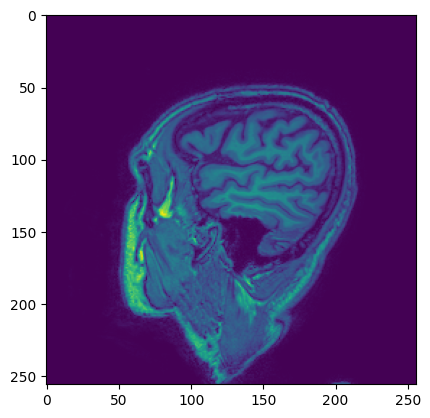

In [30]:
# specify your image path
image_path = 'Comparing Labels/002_S_0295/MPRAGE/2011-06-02_07_58_50.0/I238627' + '/' + in_order_df['Names'][42]
ds = dicom.dcmread(image_path)
plt.imshow(ds.pixel_array)

ds.pixel_array

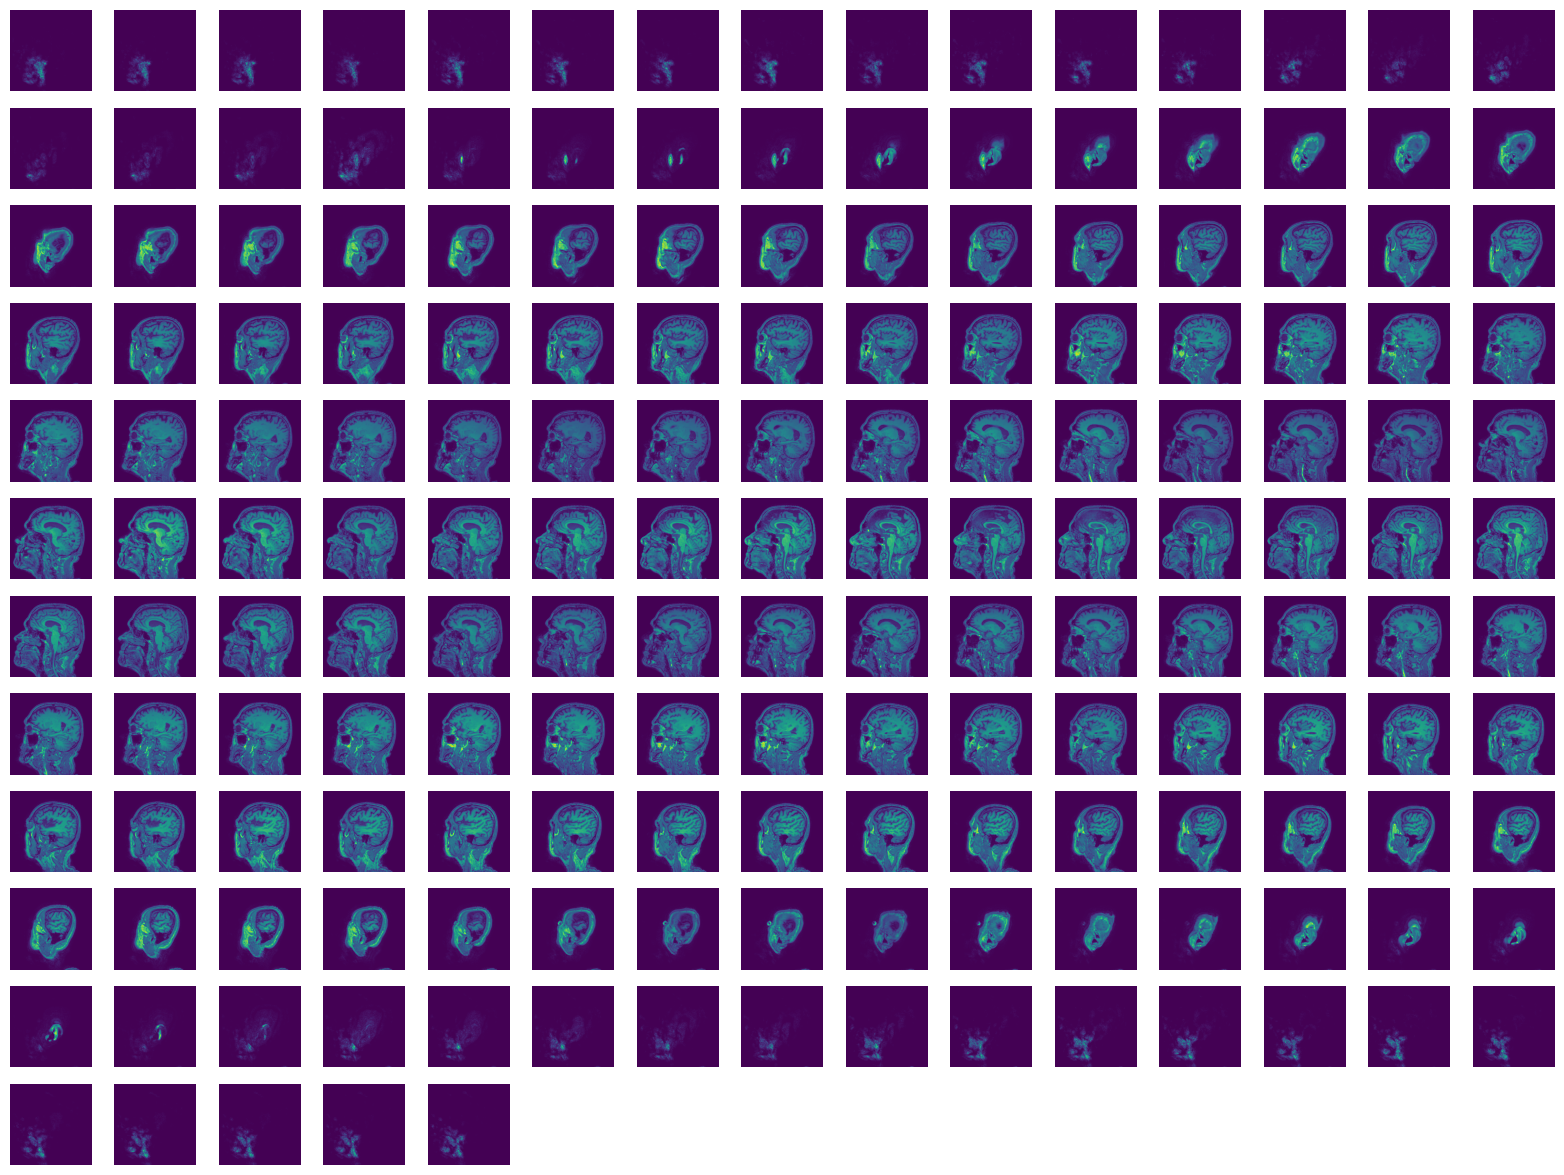

In [43]:
plt.figure(figsize=(20,15))
for i in range(len(get_3d_matrix(directory, get_in_order_df(directory)))):
    plt.subplot(12,15,i+1)
    plt.imshow(get_3d_matrix(directory, get_in_order_df(directory))[i])
    plt.axis('off')

In [14]:
pattern = re.compile(r'ADNI_.+_.+_.+_.+_.+[_].+_.+_.+_(\d+)_.+_.+')
pattern2 = re.compile(r'I\d{5,7}\b')
pattern3 = re.compile(r'3d_matrix')

In [15]:
all_dirs = []
for root, dirs, files in walk(target_directory):
    for dir in dirs:
        if re.search(pattern2, dir):
            # dir_path = make_dir(root, dir)
            # in_order_df = get_in_order_df(path.join(root, dir))
            # matrix_3d = get_3d_matrix(path.join(root, dir), in_order_df)
            # np.save(dir_path + dir + '_3d_matrix', matrix_3d)
            # save_indiv_pm(in_order_df, dir_path, root, dir)
            all_dirs.append(dir)

In [16]:
len(all_dirs)

579

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pydicom as dicom
import matplotlib.pylab as plt
from os import listdir, walk, path, makedirs
import pandas as pd
import re
import numpy as np
import sys
import time

pattern = re.compile(r'ADNI_.+_.+_.+_.+_.+[_].+_.+_.+_(\d+)_.+_.+')
pattern2 = re.compile(r'I\d{5,7}\b')
pattern3 = re.compile(r'3d_matrix')

main_directory = sys.argv[1]
meta_dir = os.path.join(main_directory, 'Meta Data')

def get_in_order_df(directory):
    file_names = listdir(directory)
    in_order_df = pd.DataFrame({'Names':file_names,'Order':[int(re.findall(pattern,filename)[0]) for filename in file_names]})
    in_order_df = in_order_df.sort_values('Order').reset_index(drop=True)
    return in_order_df

def get_3d_matrix(directory, in_order_df):
    matrices = []
    for i in range(len(in_order_df)):
        image = directory + '/' + in_order_df['Names'][i]
        ds = dicom.dcmread(image)
        matrices.append(ds.pixel_array)
    matrix_3d = np.stack(matrices,axis=0)
    return matrix_3d

def make_dir(root, dir):
    dir_path = path.join(root, dir + '_Pixel_Matrices/')
    if not path.exists(dir_path):
        makedirs(dir_path)
    return dir_path

def save_indiv_pm(in_order_df, dir_path, root, dir):
    for i in range(len(in_order_df)):
        image = path.join(root, dir) + '/' + in_order_df['Names'][i]
        pm = dicom.dcmread(image).pixel_array 
        np.save(dir_path + in_order_df['Names'][i][:-4] + '_pm', pm)

def save_matrices(directory):
    for root, dirs, files in walk(directory):
        for dir in dirs:
            if re.search(pattern2, dir):
                dir_path = make_dir(root, dir)
                in_order_df = get_in_order_df(path.join(root, dir))
                matrix_3d = get_3d_matrix(path.join(root, dir), in_order_df)
                np.save(dir_path + dir + '_3d_matrix', matrix_3d)
                save_indiv_pm(in_order_df, dir_path, root, dir)

def create_csv(directory):
    with open(directory + '/' + 'Image_Paths.csv', 'w') as f:
        for root, dirs, files in walk(directory):
            for name in files:
                if name == '.DS_Store':
                    continue
                if re.search(pattern3, name):
                    f.write(path.join(root, name) + '\n')

if __name__ == "__main__":
    if not os.path.isdir(meta_dir):
        print(f"Error: Required directory '{meta_dir}' does not exist.")
        sys.exit(1)
    print(f"Directory '{meta_dir}' exists. Continuing with the script...")
    # start_time = time.time()
    # save_matrices(sys.argv[1])
    # create_csv(sys.argv[1])
    # end_time = time.time()
    # print(f'{end_time - start_time} seconds')

In [83]:
# looping through and deleting the files to retry
import shutil
delete_pattern = re.compile(r'I\d{5,7}_')
for root, dirs, files in walk(testing_big_directory):
    for dir in dirs:
        if re.search(delete_pattern, dir):
            dir_path = path.join(root, dir)
            #print(dir_path)
            #shutil.rmtree(dir_path)

In [2]:
# old version of this function

def create_csv(directory1, directory2):
    paths = []
    groups = []
    for root, dirs, files in walk(directory1):
        for name in files:
            if name == '.DS_Store':
                continue
            if re.search(pattern3, name):
                paths.append(path.join(root, name))
    for file in listdir(directory2):
        if file == '.DS_Store':
            continue
        if re.search(meta_pattern, file):
            xml_file = path.join(meta_dir,file)
            tree = ET.parse(xml_file)
            root = tree.getroot()
            groups.append(root.find('project').find('subject').find('researchGroup').text)
    df = pd.DataFrame({'File Path':paths, 'Research Group': groups})
    df.to_csv(path.join(directory1, 'Images.csv'),index=False)

In [3]:
# newer version

def create_csv(directory1, directory2):
    paths = []
    groups = []
    id_pattern = re.compile(r'I\d{5,7}')
    for root, dirs, files in walk(directory1):
        for name in files:
            if name == '.DS_Store':
                continue
            if re.search(pattern3, name):
                paths.append(path.join(root, name))
                image_id = re.search(id_pattern, name)
                for file in listdir(directory2):
                    if re.search(image_id.group(), file):
                        xml_file = path.join(meta_dir,file)
                        tree = ET.parse(xml_file)
                        root = tree.getroot()
                        groups.append(root.find('project').find('subject').find('researchGroup').text)
                        break
    df = pd.DataFrame({'File Path':paths, 'Research Group': groups})
    df.to_csv(path.join(directory1, 'Images.csv'),index=False)

# topic break

In [5]:
pattern = re.compile(r'ADNI_.+_.+_.+_.+_.+[_].+_.+_.+_(\d+)_.+_.+\.npy')
meta_pattern = re.compile(r'ADNI_')

directory = 'Big Attempt/'

def create_2d_csv(directory1, directory2):
    paths = []
    groups = []
    for root, dirs, files in walk(directory1):
        for name in files:
            if name == '.DS_Store':
                continue
            if re.search(pattern, name):
                paths.append(path.join(root, name))
    for file in listdir(directory2):
        if file == '.DS_Store':
            continue
        if re.search(meta_pattern, file):
            xml_file = path.join(directory2,file)
            tree = ET.parse(xml_file)
            root = tree.getroot()
            groups.append(root.find('project').find('subject').find('researchGroup').text + file)
    return paths, groups

x,y=create_2d_csv(path.join(directory,'ADNI'),path.join(directory,'Meta Data'))

In [186]:
def create_3d_csv(directory1, directory2):
    paths = []
    groups = []
    for root, dirs, files in walk(directory1):
        for name in files:
            if name == '.DS_Store':
                continue
            if re.search(pattern3, name):
                paths.append(path.join(root, name))
                image_id = re.search(pattern2, name)
                for file in listdir(directory2):
                    if re.search(image_id.group(), file):
                        xml_file = path.join(meta_dir,file)
                        tree = ET.parse(xml_file)
                        root = tree.getroot()
                        groups.append(root.find('project').find('subject').find('researchGroup').text)
                        break
    df = pd.DataFrame({'File Path':paths, 'Research Group': groups})
    df.to_csv(path.join(directory1, '3D_Images.csv'),index=False)

In [15]:
# full_paths_list = []
# for i in range(len(y)):
#     image_id = re.findall(pattern2, y[i])[0]
#     full_paths_list += [value for j, value in enumerate(x) if value.find(image_id) != -1]

In [208]:
def populate_labels(paths_list, labels_list):
    labels = []
    length = len(paths_list)
    for i in range(length):
        image_id = re.findall(pattern2, paths_list[i])[0]
        y_entry = [entry for entry in labels_list if re.search(image_id, entry)][0]
        label = re.search(pattern4, y_entry)[0]
        labels.append(label)
    if len(labels) == length:
        df = pd.DataFrame({'Paths':paths_list, 'Labels':labels})
        for i in range(len(df)):
            if (df['Labels'][i] == 'EMCI') | (df['Labels'][i] == 'LMCI'):
                df['Labels'][i] = 'MCI'
            elif df['Labels'][i] == 'SMC':
                df['Labels'][i] = 'AD'
    else:
        print('Lengths incompatible')
    return df

In [85]:
pattern2 = re.compile(r'I\d{5,7}')
pattern3 = re.compile(r'3d_matrix')
pattern4 = re.compile(r'MCI|AD|CN|EMCI|LMCI|SMC')

In [65]:
labels = []
for i in range(len(x)):
    image_id = re.compile(re.findall(pattern2, x[i])[0])
    y_entry = [entry for entry in y if re.search(image_id, entry)][0]
    label = re.search(pattern4, y_entry)[0]
    labels.append(label)

In [79]:
df = pd.DataFrame({'Paths':x, 'Labels':labels})

In [80]:
for i in range(len(df)):
    if (df['Labels'][i] == 'EMCI') | (df['Labels'][i] == 'LMCI'):
        df['Labels'][i] = 'MCI'
    elif df['Labels'][i] == 'SMC':
        df['Labels'][i] = 'AD'

In [187]:
directory = 'TBD_2/'

In [209]:
def create_csv(directory1, directory2):
    paths_2d = []
    paths_3d = []
    groups = []
    n = 0
    for root, dirs, files in walk(directory1):
        for name in files:
            a = 'No'
            new_path = path.join(root, name)
            if name == '.DS_Store':
                continue
            if re.search(pattern3, name):
                paths_3d.append(new_path)
                a = 'Yes'
            if re.search(pattern, name):
                paths_2d.append(new_path)
            if a == 'Yes':
                image_id = re.search(pattern2, name)
                for file in listdir(directory2):
                    if re.search(image_id.group(), file):
                        xml_file = path.join(directory2,file)
                        tree = ET.parse(xml_file)
                        xml_root = tree.getroot()
                        groups.append(xml_root.find('project').find('subject').find('researchGroup').text + file)
                        break
    # df1 = pd.DataFrame({'File Path':paths_3d, 'Research Group': groups})
    # df1.to_csv(path.join(directory1, '3D_Images.csv'),index=False)
    # df2 = populate_labels(paths_2d, groups)
    # df1.to_csv(path.join(directory1, '2D_Images.csv'),index=False)
    return paths_2d, paths_3d, groups

In [210]:
w,z,s = create_csv(path.join(directory,'ADNI'),path.join(directory,'Meta Data'))

In [211]:
df = populate_labels(w,s)

8300